# About this notebook 

#### Objective: Exploratory Data Analysis


<div class="span5 alert alert-success">
<p> <I> Logins File Description: </I> The logins.json file contains (simulated) timestamps of user logins in a particular
geographic location.  
<br>
This notebook aggregates these login counts based on 15 minute
time intervals, and visualizes and describes the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand.   
<br>
Highlights of the important features of the demand, such as daily cycles are noted and if there are data quality issues, these are noted as well.
 <br>
 </p>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\Section17.1TakeHomeChallenge-UltimateTechnologiesInc\ultimate_challenge

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\Section17.1TakeHomeChallenge-UltimateTechnologiesInc\ultimate_challenge


<div class="span5 alert alert-info">
<p> <B>  Imports and Data Loading: </B>  </p>
</div>

In [2]:
#Imports
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import the json logins file
with open('logins.json', 'r') as json_file:
    json_data = json.load(json_file)

type(json_data)

dict

In [10]:
#Aggregate the timestamps into 15 minute periods
mylist = list(json_data.values())

flat_list = [item for sublist in mylist for item in sublist]

play_list = flat_list
df1 = pd.DataFrame(play_list)
df1.columns = ['listvalues']

df1['datetime'] =  pd.to_datetime(df1['listvalues'])
df1.index = pd.DatetimeIndex(df1.datetime)
df1 = df1.drop('datetime',axis=1)

df1 = df1.sort_index()

new = df1.groupby(pd.TimeGrouper('15Min'),as_index=False).apply(lambda x: x['listvalues'])
df1['period'] = new.index.get_level_values(0)
df1.head(3)

,listvalues,period
datetime,,
1970-01-01 20:12:16,1970-01-01 20:12:16,0
1970-01-01 20:13:18,1970-01-01 20:13:18,0
1970-01-01 20:16:10,1970-01-01 20:16:10,1


<div class="span5 alert alert-info">
<p> <B>  Missing Data: </B>   

</p>
</div>

In [11]:
# Percentage of missing values in each column
pd.DataFrame(
    df1.isnull().sum() / len(df1),
    columns=['% Missing Values']
).transpose()

,listvalues,period
% Missing Values,0.0,0.0


<div class="span5 alert alert-info">
<p> <B>  Exploratory Data Analysis </B>  </p>
</div>

<div class="span5 alert alert-success">
<p> Describe and visualize the data for trends
 </p>
</div>

In [21]:
#Count the number of logins for each 15 minute period
dfc = df1.groupby(['period']).agg('count')
dfc.columns = ['loginscount']
dfc.count()

loginscount    9381
dtype: int64

In [25]:
dfc.describe()

,loginscount
count,9381.000000
mean,9.928792
std,8.263146
min,1.000000
25%,4.000000
50%,8.000000
75%,14.000000
max,73.000000


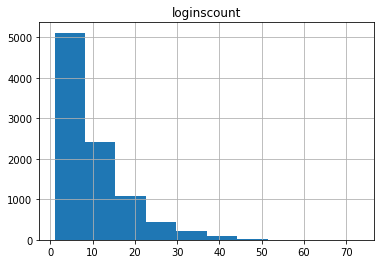

In [16]:
#Create a histogram to assess the distribution
dfc.hist()
plt.show()

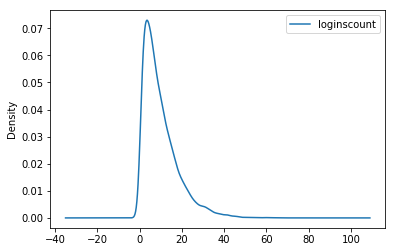

In [19]:
#Create a density plot to help further understand the distribution
dfc.plot(kind='density', subplots=False, layout=(1,1), sharex=False)
plt.show()

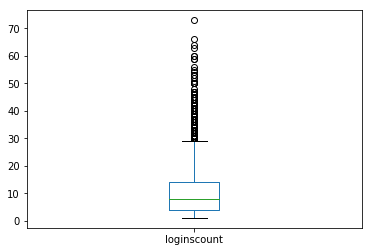

In [23]:
#Create a box plot
dfc.plot(kind='box', subplots=False, layout=(1,1), sharex=False, sharey=False)
plt.show()